         Raza   Tamaño  Edad  Peso
0  Rottweiler  Mediano     7    26
1   Chihuahua  Mediano     4    46
2      Beagle  Pequeño    13    10
3     Bulldog  Pequeño    11    19
4     Bulldog  Pequeño     8    47


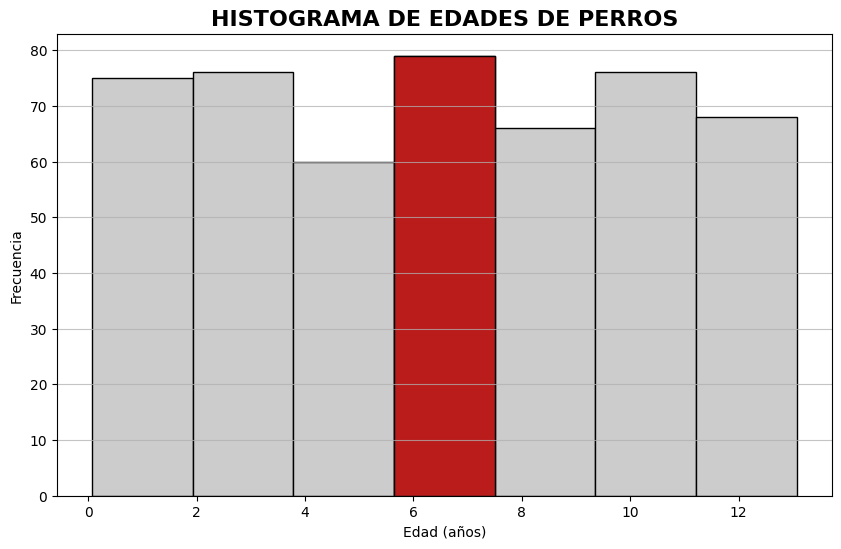

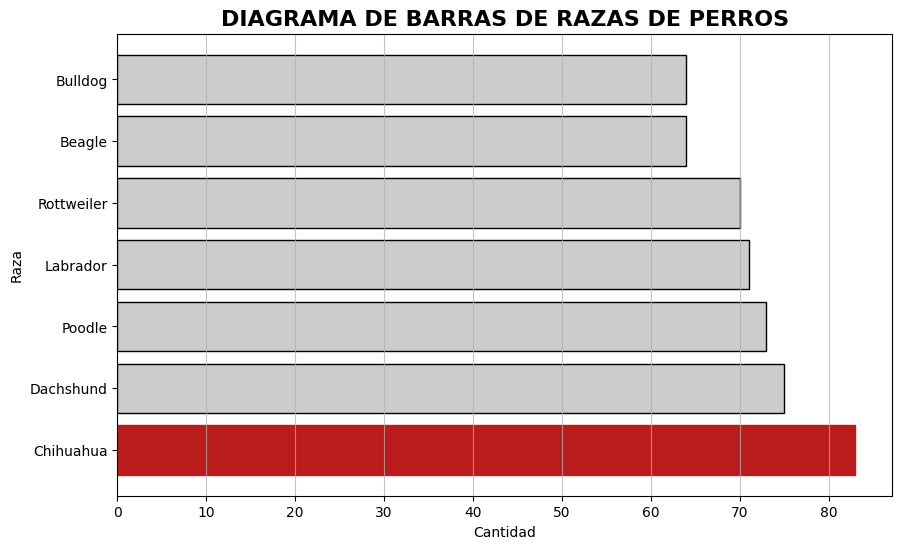

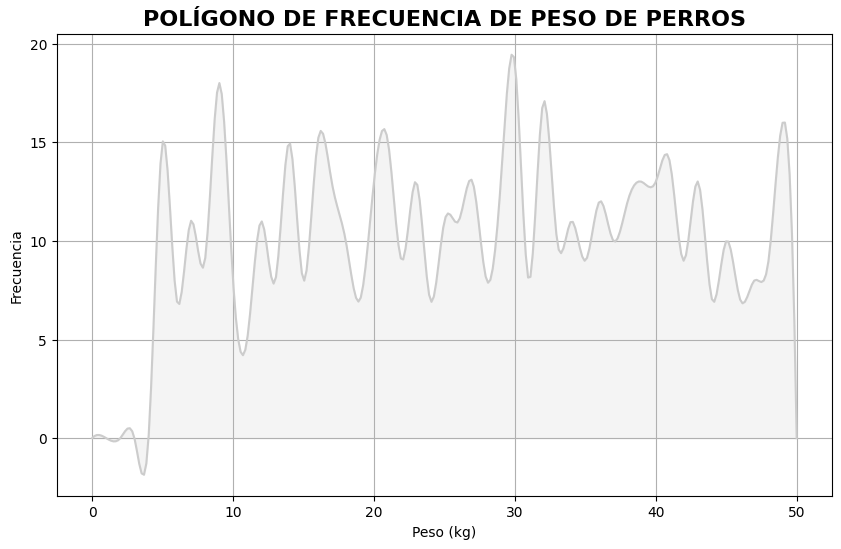

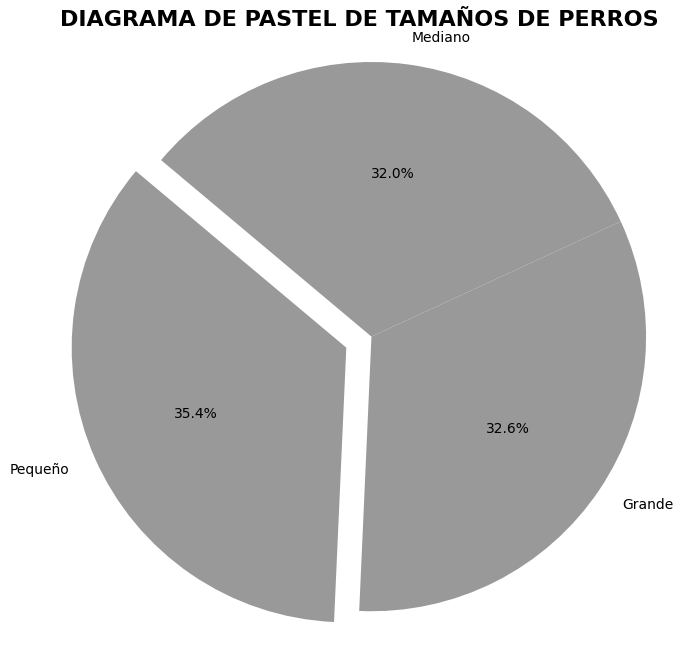

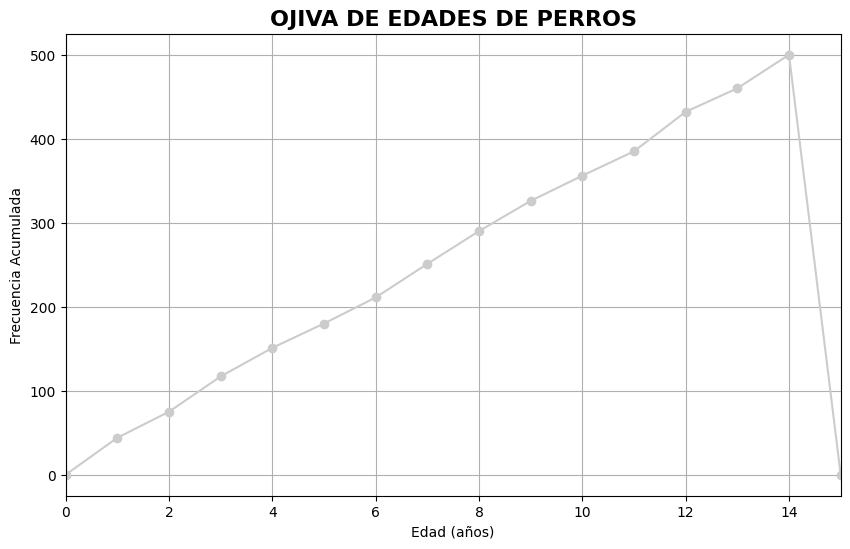

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Generar datos aleatorios
np.random.seed(42)
data_size = 500

# Datos sobre perros
razas = ['Labrador', 'Bulldog', 'Poodle', 'Beagle', 'Rottweiler', 'Chihuahua', 'Dachshund']
tamanos = ['Pequeño', 'Mediano', 'Grande']
edades = np.random.randint(1, 15, size=data_size)  # Edad en años
peso = np.random.randint(5, 50, size=data_size)     # Peso en kg

# Crear DataFrame
df = pd.DataFrame({
    'Raza': np.random.choice(razas, data_size),
    'Tamaño': np.random.choice(tamanos, data_size),
    'Edad': edades,
    'Peso': peso
})

# Mostrar la tabla
print(df.head())

# Gráficas

# 1. Histograma de edades
plt.figure(figsize=(10, 6))
hist, bins = np.histogram(df['Edad'], bins=7)
plt.bar(bins[:-1], hist, width=np.diff(bins), color='#cccccc', edgecolor='black', alpha=1)
max_height_index = np.argmax(hist)  # Índice de la barra más alta
plt.bar(bins[max_height_index], hist[max_height_index], width=np.diff(bins)[max_height_index], color='#ba1b1b', edgecolor='black')
plt.title('HISTOGRAMA DE EDADES DE PERROS', fontsize=16, fontweight='bold')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Diagrama de barras horizontales de razas
top_razas = df['Raza'].value_counts().nlargest(7)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_razas.index, top_razas.values, color='#cccccc', edgecolor='black', height=0.8)
max_bar_index = np.argmax(top_razas.values)  # Índice de la barra más alta
bars[max_bar_index].set_color('#ba1b1b')  # Color rojo para la barra más alta
plt.title('DIAGRAMA DE BARRAS DE RAZAS DE PERROS', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad')
plt.ylabel('Raza')
plt.grid(axis='x', alpha=0.75)
plt.show()

# 3. Polígono de frecuencia de peso
peso_counts = df['Peso'].value_counts().sort_index()
peso_counts = peso_counts.reindex(range(0, 51), fill_value=0)  # Asegurarse de que comienza y termina en 0

# Suavizar la curva
x = np.arange(len(peso_counts))
spl = make_interp_spline(x, peso_counts.values, k=3)  # Suavizado cúbico
x_smooth = np.linspace(0, len(peso_counts)-1, 300)
y_smooth = spl(x_smooth)

plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='#cccccc')
plt.fill_between(x_smooth, y_smooth, alpha=0.2, color='#cccccc')
plt.title('POLÍGONO DE FRECUENCIA DE PESO DE PERROS', fontsize=16, fontweight='bold')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# 4. Diagrama de pastel de tamaños
tamanos_counts = df['Tamaño'].value_counts()
color = '#999999'  # Color gris

# Identificar el índice del segmento con el porcentaje más alto
max_index = tamanos_counts.idxmax()
explode = [0.1 if label == max_index else 0 for label in tamanos_counts.index]  # Resaltar el segmento con el máximo

plt.figure(figsize=(8, 8))
plt.pie(tamanos_counts, labels=tamanos_counts.index, autopct='%1.1f%%', startangle=140, colors=[color]*len(tamanos_counts), explode=explode)
plt.title('DIAGRAMA DE PASTEL DE TAMAÑOS DE PERROS', fontsize=16, fontweight='bold')
plt.axis('equal')  # Para que el pastel sea un círculo
plt.show()

# 5. Ojiva de edad
edad_counts = df['Edad'].value_counts().sort_index().cumsum()
edad_counts = edad_counts.reindex(range(0, 16), fill_value=0)  # Asegurarse de que comienza en 0
plt.figure(figsize=(10, 6))
plt.plot(edad_counts.index, edad_counts.values, marker='o', color='#cccccc')
plt.title('OJIVA DE EDADES DE PERROS', fontsize=16, fontweight='bold')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia Acumulada')
plt.grid()
plt.xlim(0, edad_counts.index.max())  # Asegurarse de que comience en 0
plt.show()